# Import

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chisquare
import warnings
warnings.filterwarnings('ignore')
test_path = "C:/Users/22668/Desktop/github/sin-hoyeon/open/test.csv"
train_path = "C:/Users/22668/Desktop/github/sin-hoyeon/open/train.csv"

In [2]:
class CFG:
    SEED = 42

In [3]:
train = pd.read_csv(train_path)
train_len = len(train)
test = pd.read_csv(test_path)
id_test = test["id"]
test = pd.read_csv(test_path)

In [4]:
dataset = pd.concat([train,test],axis=0).reset_index(drop=True)

In [5]:
dataset

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,TEST_170,0,0,0,2,A G,G G,C C,A A,C A,...,A A,G G,A A,G G,G G,A A,A A,A A,G A,NaN
433,TEST_171,0,0,0,2,G G,A A,A A,A A,C A,...,A A,A A,A A,A G,A A,A A,A G,A A,G A,NaN
434,TEST_172,0,0,0,2,G G,A A,A A,A A,C A,...,A A,A A,A A,G G,A G,A A,A G,A A,G G,NaN
435,TEST_173,0,0,0,2,A G,G G,C A,G A,C C,...,A A,G A,A A,G G,A G,A A,A A,A A,A A,NaN


# EDA

## father,mother,gender
- father,mother,gender = 0 => drop


In [6]:
dataset = dataset.drop(columns = ["father","mother","gender"])

In [7]:
dataset

,id,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,2,G G,A G,A A,G A,C A,A A,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,2,A G,A G,C A,A A,A A,A G,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,2,G G,G G,A A,G A,C C,G G,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,1,A A,G G,A A,G A,A A,G G,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,2,G G,G G,C C,A A,C C,A A,A A,A A,A A,G G,A A,A A,A G,A A,G A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,TEST_170,2,A G,G G,C C,A A,C A,A G,A A,G G,A A,G G,G G,A A,A A,A A,G A,NaN
433,TEST_171,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,A G,A A,A A,A G,A A,G A,NaN
434,TEST_172,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,G G,A G,A A,A G,A A,G G,NaN
435,TEST_173,2,A G,G G,C A,G A,C C,G G,A A,G A,A A,G G,A G,A A,A A,A A,A A,NaN


# trait
- trait = 1 => class A
- trait = 2 => class B or C

## SNP_01 

- class = B 인 경우, AA는 아예 없음 = > feature extraction hasGG 추가

추후 고려사항
- class = A 인 경우, AA가 좀 높음
- class = B 인 경우, GG가 압도적으로 높음
- class = C 인 경우, GG가 좀 높음

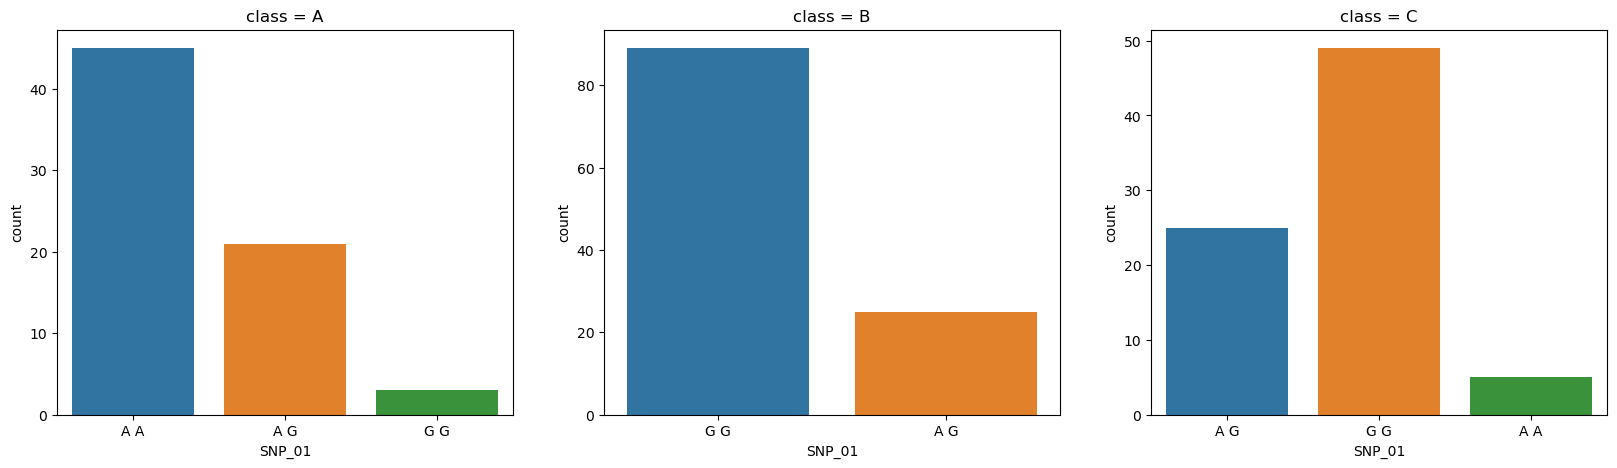

In [8]:
col = "SNP_01"

plt.subplots(1,3,figsize=(20,5))
i=1
for cl in ["A","B","C"]:
    plt.subplot(1,3,i)
    plt.title("class = {}".format(cl))
    sns.countplot(x=dataset.loc[dataset["class"] == cl,col])
    i+=1
#sns.countplot(dataset[dataset["class"] == "A"],x="SNP_01")

## SNP_02
- class = A인 경우, AA는 없음 => f.e has02AA

추후 고려
- B,의 경우 AG->GG-AA 순
- C,의 경우 AG->GG->AA 순

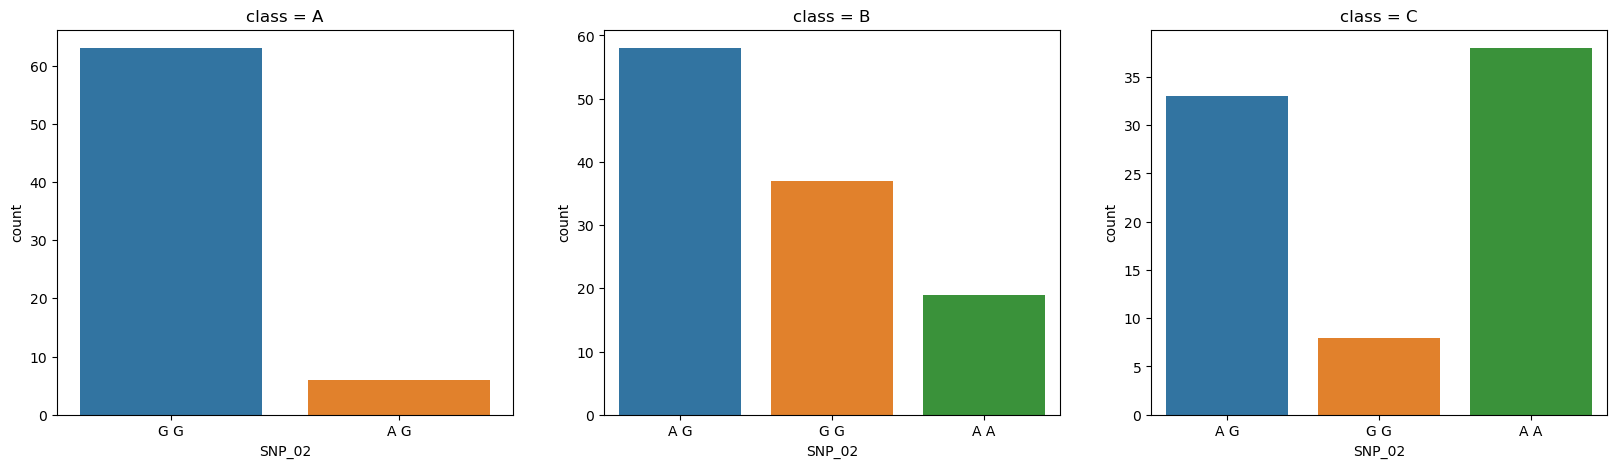

In [9]:
col = "SNP_02"

plt.subplots(1,3,figsize=(20,5))
i=1
for cl in ["A","B","C"]:
    plt.subplot(1,3,i)
    plt.title("class = {}".format(cl))
    sns.countplot(x=dataset.loc[dataset["class"] == cl,col])
    i+=1
#sns.countplot(dataset[dataset["class"] == "A"],x="SNP_01")

## SNP_03
- A인 경우 , 무조건 AA만 존재 => feature extraction 

추후 고려
나머지는 뭐 대충 고르게

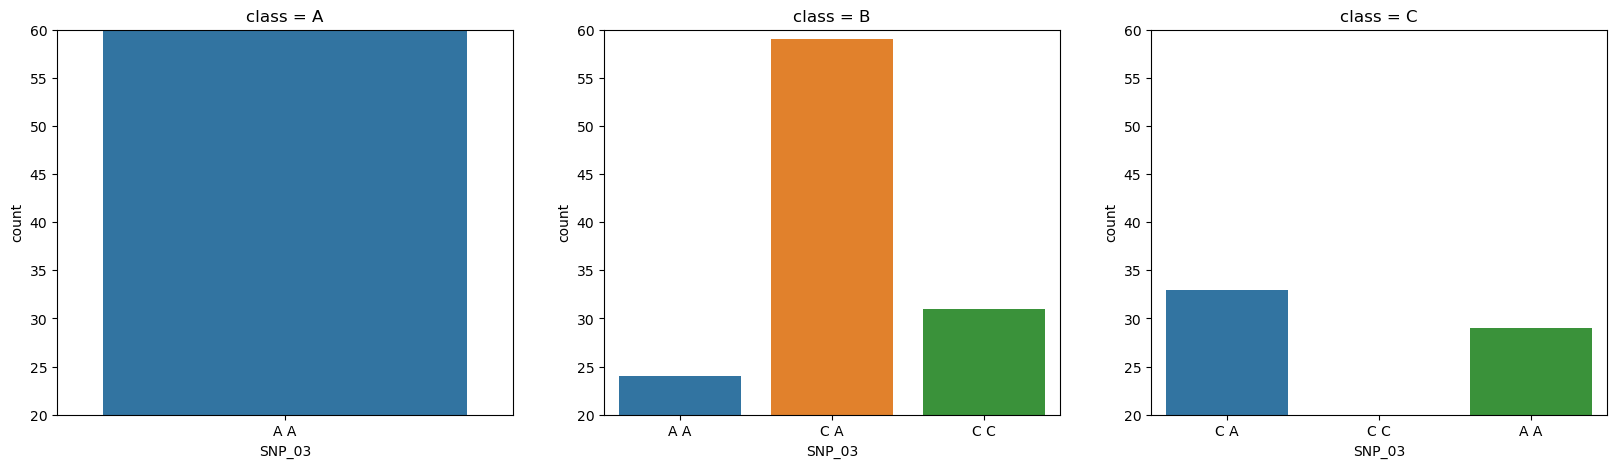

In [10]:
col = "SNP_03"

plt.subplots(1,3,figsize=(20,5))
i=1
for cl in ["A","B","C"]:
    plt.subplot(1,3,i)
    plt.title("class = {}".format(cl))
    sns.countplot(x=dataset.loc[dataset["class"] == cl,col])
    plt.ylim(20,60)
    i+=1
#sns.countplot(dataset[dataset["class"] == "A"],x="SNP_01")

## SNP_04
- C인 경우 , GG는 없음 => feature extraction has04GG

추후 고려
나머지는 뭐 대충 고르게
- class A인 경우,AA가 압도적으로 낮음 => feature extraction 

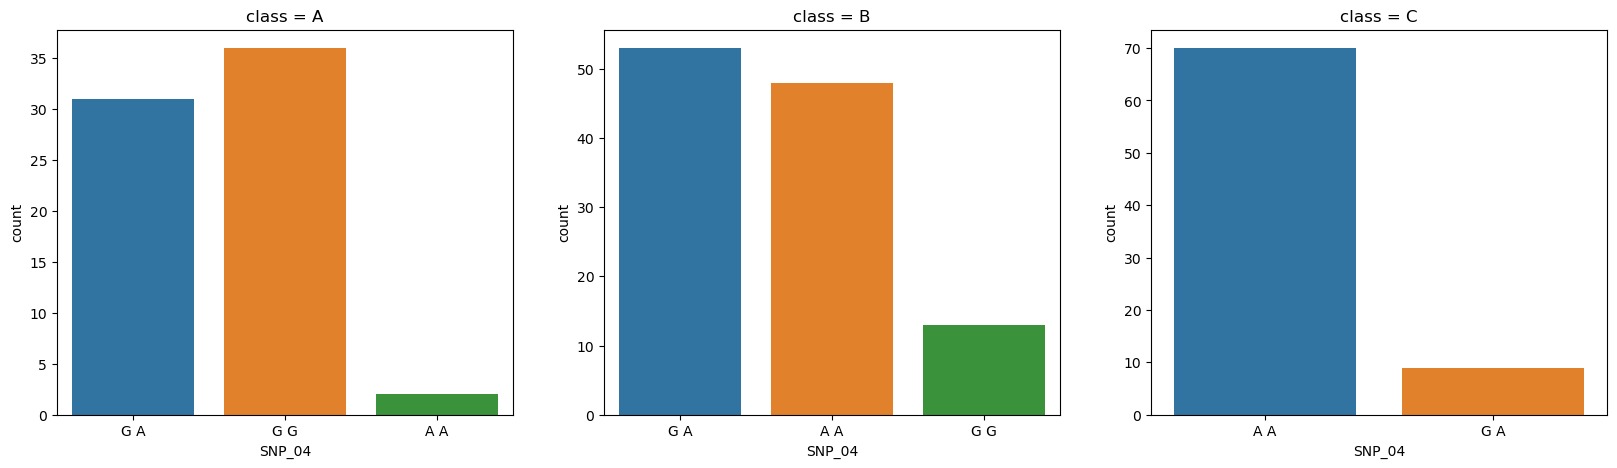

In [11]:
col = "SNP_04"

plt.subplots(1,3,figsize=(20,5))
i=1
for cl in ["A","B","C"]:
    plt.subplot(1,3,i)
    plt.title("class = {}".format(cl))
    sns.countplot(x=dataset.loc[dataset["class"] == cl,col])
    i+=1
#sns.countplot(dataset[dataset["class"] == "A"],x="SNP_01")

## SNP_05
- class = A인 경우, CC는 없음

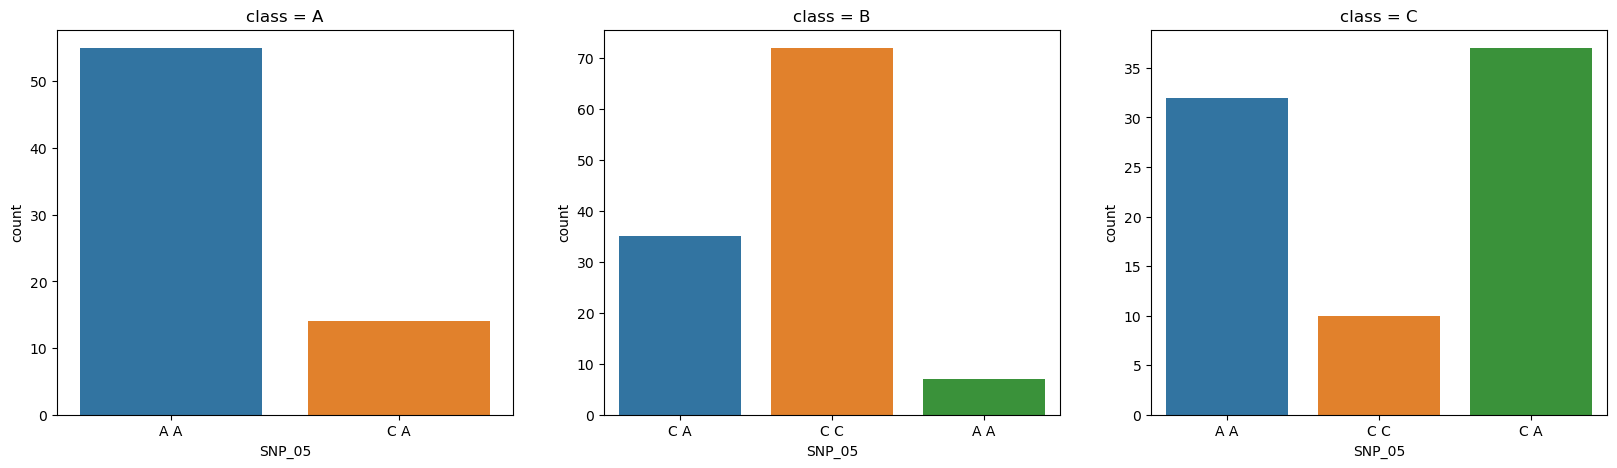

In [12]:
col = "SNP_05"

plt.subplots(1,3,figsize=(20,5))
i=1
for cl in ["A","B","C"]:
    plt.subplot(1,3,i)
    plt.title("class = {}".format(cl))
    sns.countplot(x=dataset.loc[dataset["class"] == cl,col])
    i+=1
#sns.countplot(dataset[dataset["class"] == "A"],x="SNP_01")

## SNP_06
- class = A인 경우, AA는 없음 => feature extraction has06AA

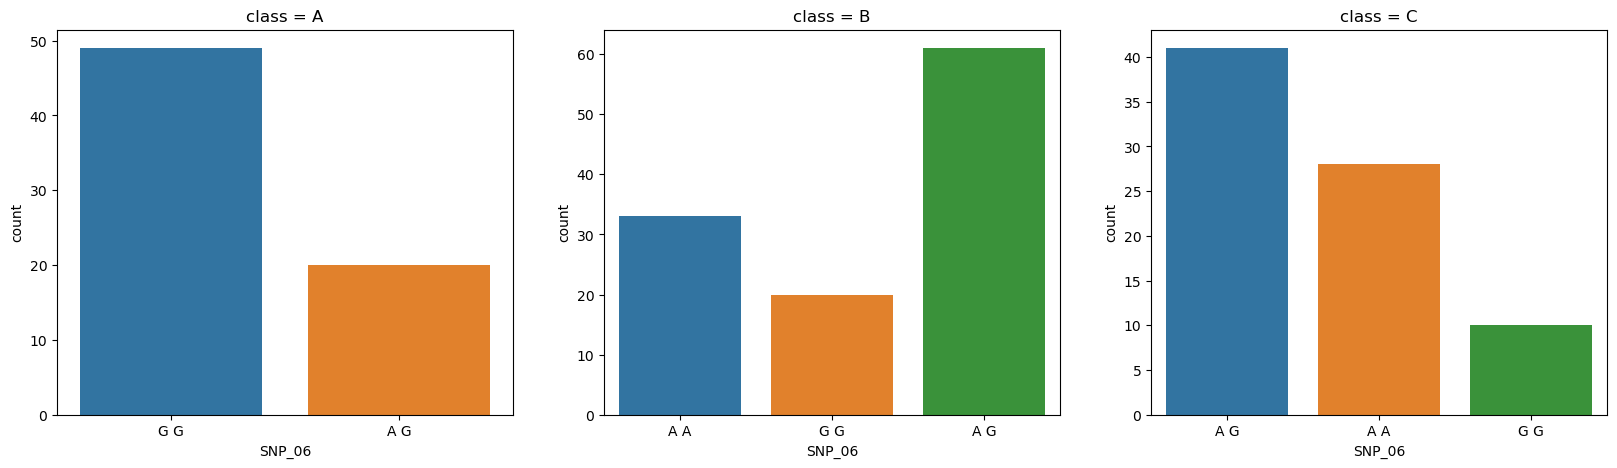

In [13]:
col = "SNP_06"

plt.subplots(1,3,figsize=(20,5))
i=1
for cl in ["A","B","C"]:
    plt.subplot(1,3,i)
    plt.title("class = {}".format(cl))
    sns.countplot(x=dataset.loc[dataset["class"] == cl,col])
    i+=1
#sns.countplot(dataset[dataset["class"] == "A"],x="SNP_01")

## SNP_07
- A의 경우 => AA는 없음 =>f.e has07AA
- B,C의 경우 => GG는 없음=>f.e has07GG

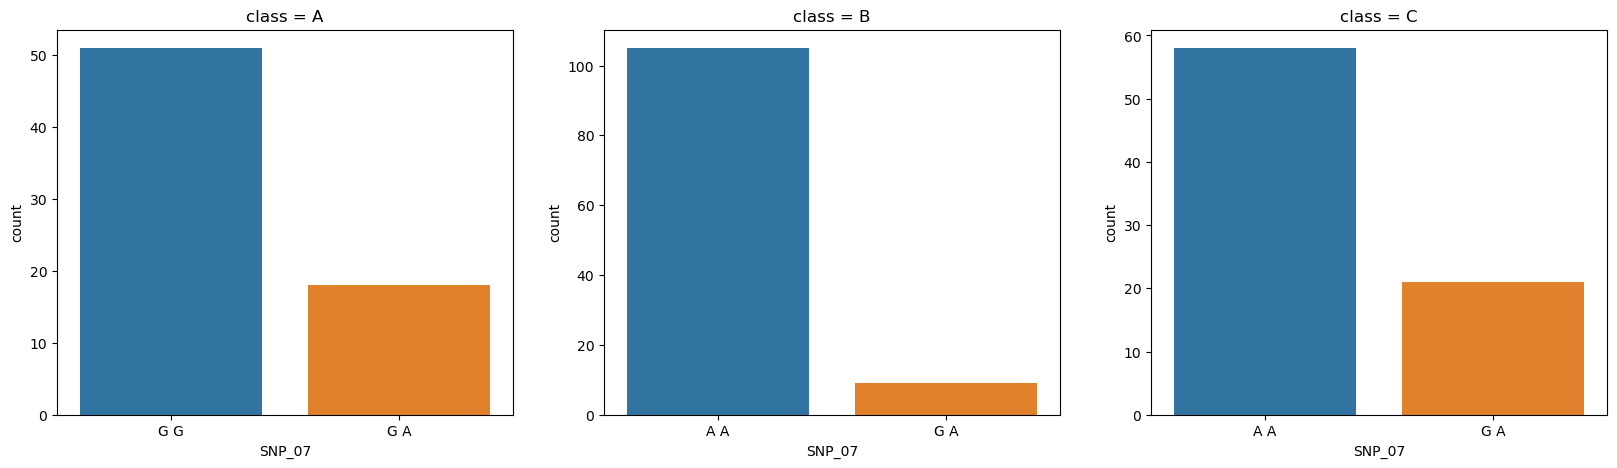

In [14]:
col = "SNP_07"

plt.subplots(1,3,figsize=(20,5))
i=1
for cl in ["A","B","C"]:
    plt.subplot(1,3,i)
    plt.title("class = {}".format(cl))
    sns.countplot(x=dataset.loc[dataset["class"] == cl,col])
    i+=1
#sns.countplot(dataset[dataset["class"] == "A"],x="SNP_01")

## SNP_08
- A의 경우 => GG는 없음 =>f.e has08GG

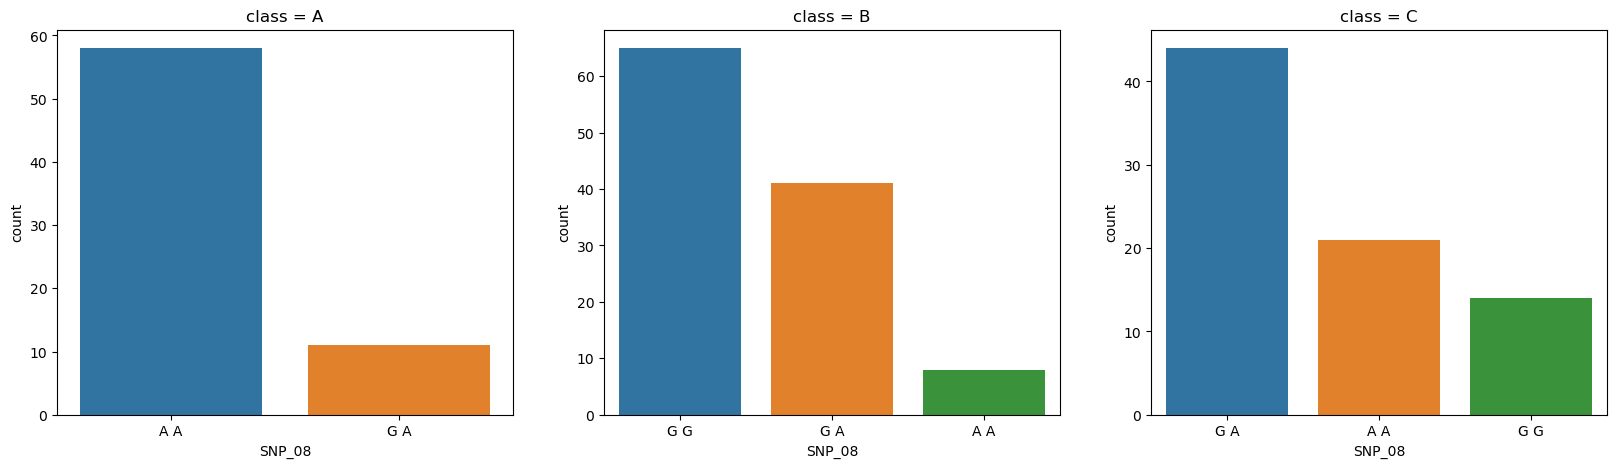

In [15]:
col = "SNP_08"

plt.subplots(1,3,figsize=(20,5))
i=1
for cl in ["A","B","C"]:
    plt.subplot(1,3,i)
    plt.title("class = {}".format(cl))
    sns.countplot(x=dataset.loc[dataset["class"] == cl,col])
    i+=1
#sns.countplot(dataset[dataset["class"] == "A"],x="SNP_01")

## SNP_09
- C의 경우 => 대부분이 AA이고 GA와 GG는 사실 없다고 봐도 무방=> f.e has09AA
- B의 경우 => GG는 거의 없음 => f.e has09GG

앞선 경우들은 빈도수가 낮은 경우네는 따로 feature extraction을 안해줬는데 왜 여기서는 해? => 여기서는 낮은 것들의 빈도수가 1로 너무 낮음,그래서 여기는 함.

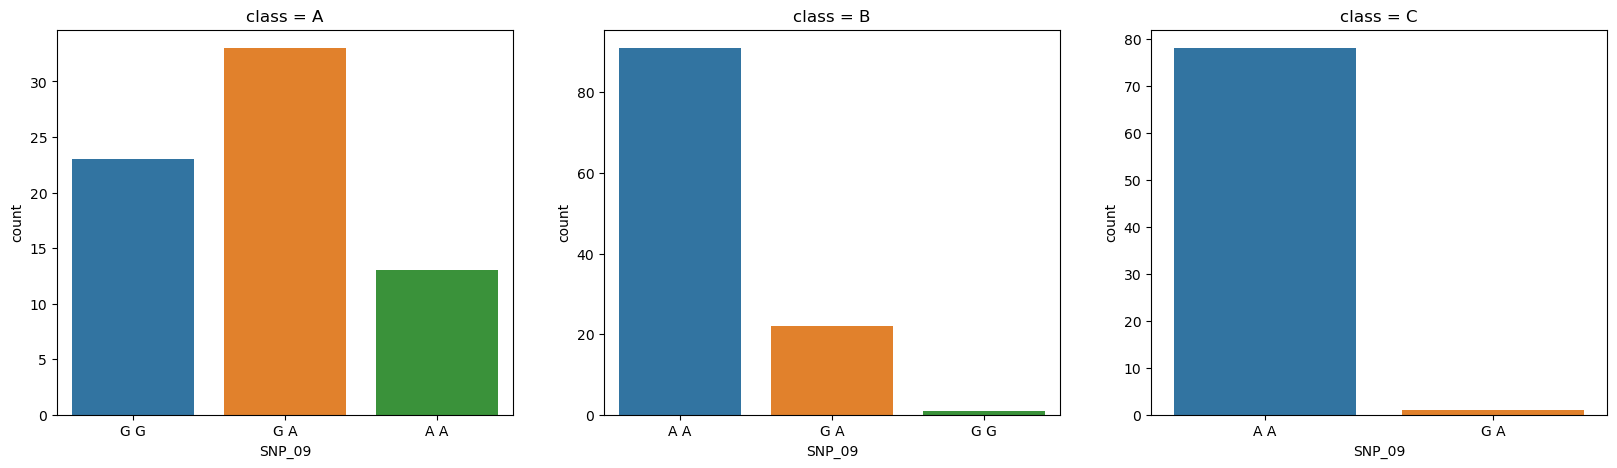

In [16]:
col = "SNP_09"

plt.subplots(1,3,figsize=(20,5))
i=1
for cl in ["A","B","C"]:
    plt.subplot(1,3,i)
    plt.title("class = {}".format(cl))
    sns.countplot(x=dataset.loc[dataset["class"] == cl,col])
    i+=1
#sns.countplot(dataset[dataset["class"] == "A"],x="SNP_01")

In [17]:
dataset.loc[dataset["class"] == "B",col].value_counts()

A A    91
G A    22
G G     1
Name: SNP_09, dtype: int64

In [18]:
dataset.loc[dataset["class"] == "C",col].value_counts()

A A    78
G A     1
Name: SNP_09, dtype: int64

## SNP_10
- A와 B에서 낮은값들이 있긴 한데 ... 그래도 특이점 1인 정도는 아님 

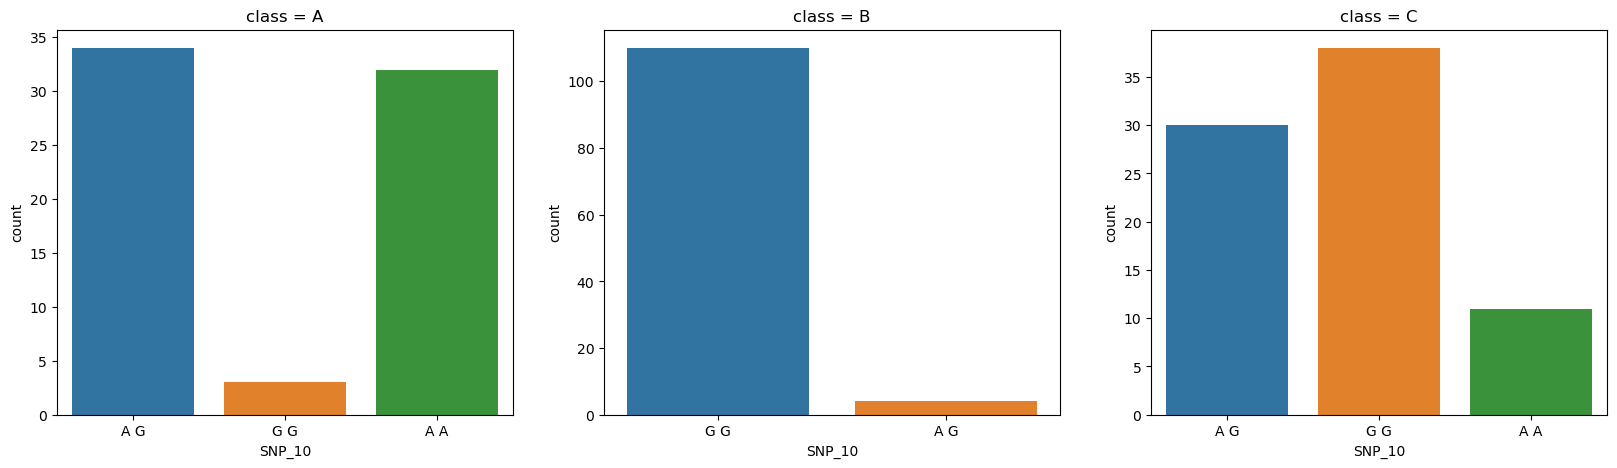

In [19]:
col = "SNP_10"

plt.subplots(1,3,figsize=(20,5))
i=1
for cl in ["A","B","C"]:
    plt.subplot(1,3,i)
    plt.title("class = {}".format(cl))
    sns.countplot(x=dataset.loc[dataset["class"] == cl,col])
    i+=1
#sns.countplot(dataset[dataset["class"] == "A"],x="SNP_01")

In [20]:
x=dataset.loc[dataset["class"] == "B",col]
x.value_counts()

G G    110
A G      4
Name: SNP_10, dtype: int64

In [21]:
x=dataset.loc[dataset["class"] == "A",col]
x.value_counts()

A G    34
A A    32
G G     3
Name: SNP_10, dtype: int64

## SNP_11
- A의 경우 => AA는 없음 =>f.e has11AA

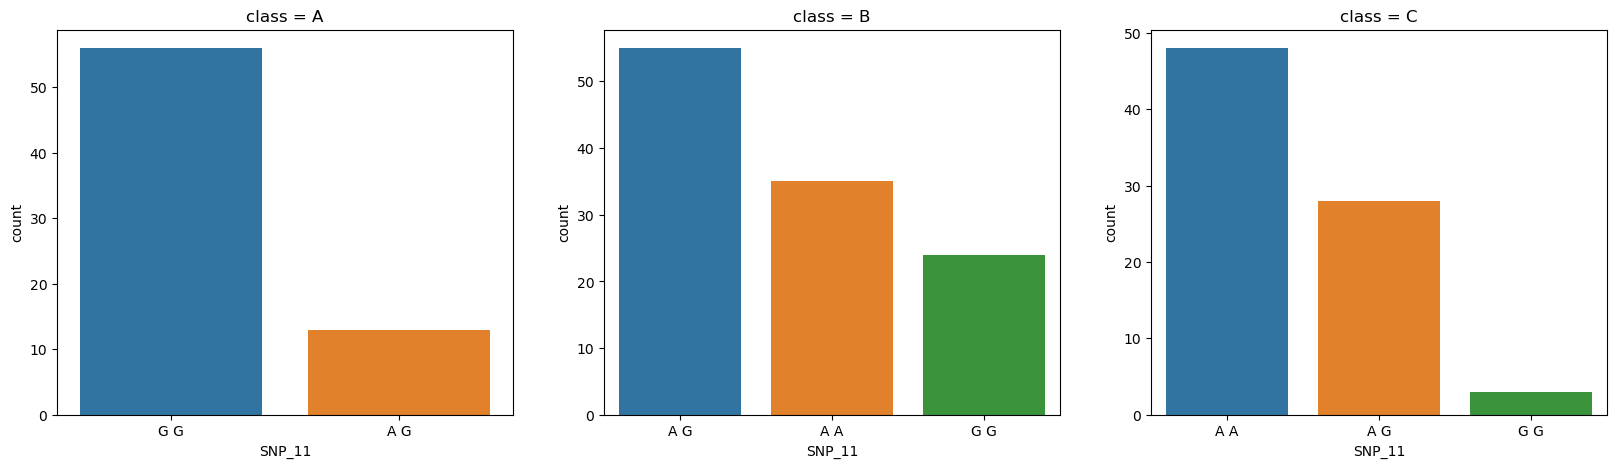

In [22]:
col = "SNP_11"

plt.subplots(1,3,figsize=(20,5))
i=1
for cl in ["A","B","C"]:
    plt.subplot(1,3,i)
    plt.title("class = {}".format(cl))
    sns.countplot(x=dataset.loc[dataset["class"] == cl,col])
    i+=1
#sns.countplot(dataset[dataset["class"] == "A"],x="SNP_01")

## SNP_12
- A의 경우 => AA가 있는 관측치가 거의 없음,GG가 있는 관측치는 많음
- B,C의 경우 => GG가 있는 관측치가 거의 없음,AA가 있는 관측치는 많음 

=>f.e has12AA<br>
=>f.e has12GG

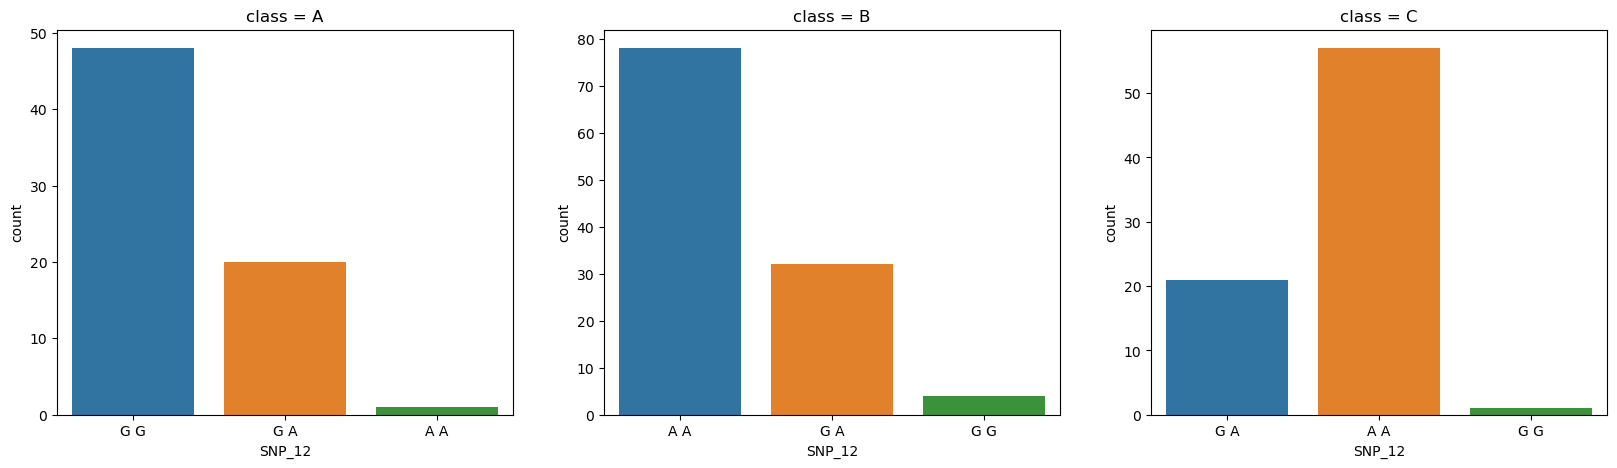

In [23]:
col = "SNP_12"

plt.subplots(1,3,figsize=(20,5))
i=1
for cl in ["A","B","C"]:
    plt.subplot(1,3,i)
    plt.title("class = {}".format(cl))
    sns.countplot(x=dataset.loc[dataset["class"] == cl,col])
    i+=1
#sns.countplot(dataset[dataset["class"] == "A"],x="SNP_01")

In [24]:
dataset.loc[dataset["class"] == "A",col].value_counts()

G G    48
G A    20
A A     1
Name: SNP_12, dtype: int64

## SNP_13
- A의 경우 => AA는 없음 => f.e has13AA

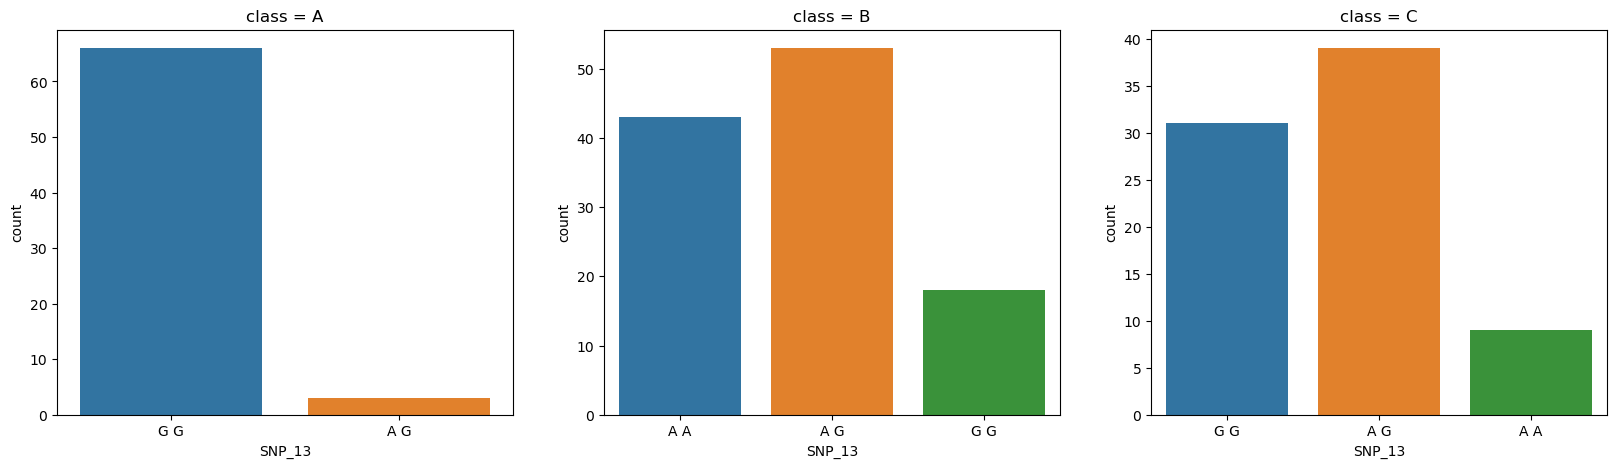

In [25]:
col = "SNP_13"

plt.subplots(1,3,figsize=(20,5))
i=1
for cl in ["A","B","C"]:
    plt.subplot(1,3,i)
    plt.title("class = {}".format(cl))
    sns.countplot(x=dataset.loc[dataset["class"] == cl,col])
    i+=1
#sns.countplot(dataset[dataset["class"] == "A"],x="SNP_01")

In [26]:
x=dataset.loc[dataset["class"] == "A",col]
x.value_counts()

G G    66
A G     3
Name: SNP_13, dtype: int64

## SNP_14
- B의 경우 => AA만 존재 =>f.e has14AA 를 추가해서 AA인것들의 계수를 결정하도록
- C의 경우 CC가 있긴 한데 .. 엄청낮긴함(그래도 1은 아니니까 f.e는 안함)

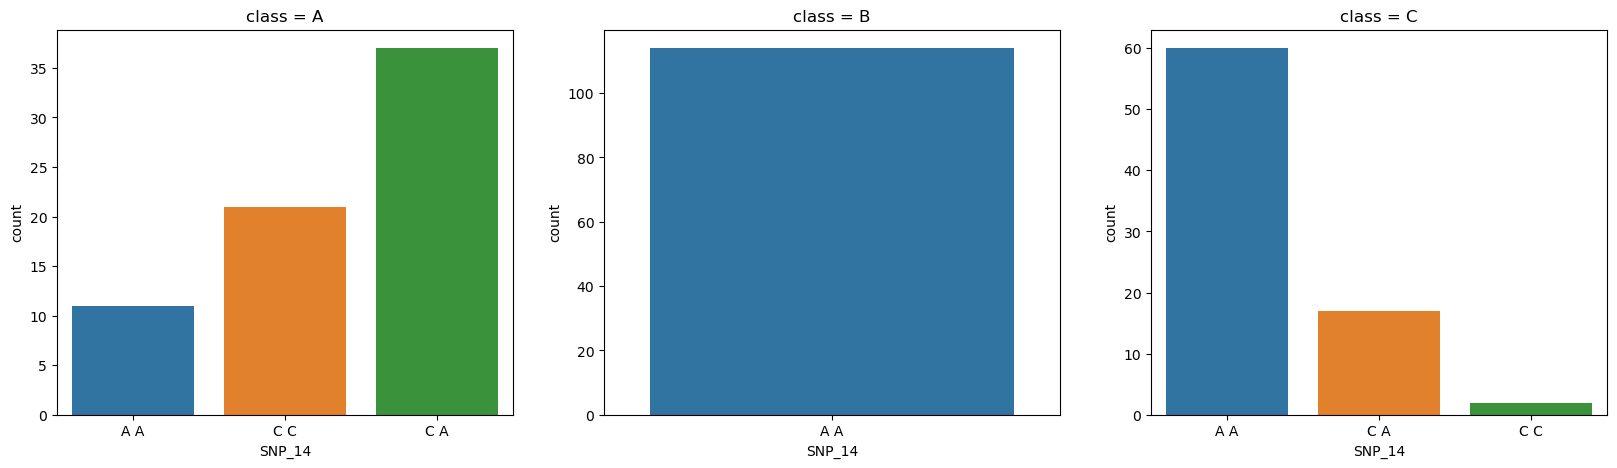

In [27]:
col = "SNP_14"

plt.subplots(1,3,figsize=(20,5))
i=1
for cl in ["A","B","C"]:
    plt.subplot(1,3,i)
    plt.title("class = {}".format(cl))
    sns.countplot(x=dataset.loc[dataset["class"] == cl,col])
    i+=1
#sns.countplot(dataset[dataset["class"] == "A"],x="SNP_01")

In [28]:
x=dataset.loc[dataset["class"] == "C",col]
x.value_counts()

A A    60
C A    17
C C     2
Name: SNP_14, dtype: int64

## SNP_15
- 별다른 특징 없음

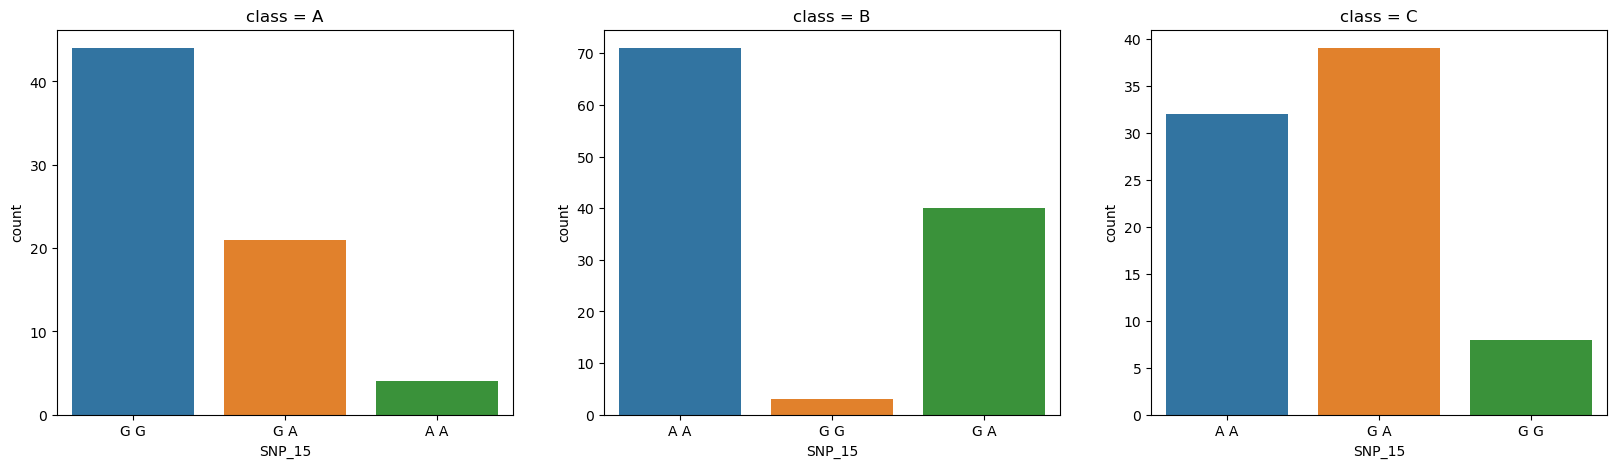

In [29]:
col = "SNP_15"

plt.subplots(1,3,figsize=(20,5))
i=1
for cl in ["A","B","C"]:
    plt.subplot(1,3,i)
    plt.title("class = {}".format(cl))
    sns.countplot(x=dataset.loc[dataset["class"] == cl,col])
    i+=1
#sns.countplot(dataset[dataset["class"] == "A"],x="SNP_01")

In [30]:
dataset

,id,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,2,G G,A G,A A,G A,C A,A A,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,2,A G,A G,C A,A A,A A,A G,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,2,G G,G G,A A,G A,C C,G G,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,1,A A,G G,A A,G A,A A,G G,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,2,G G,G G,C C,A A,C C,A A,A A,A A,A A,G G,A A,A A,A G,A A,G A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,TEST_170,2,A G,G G,C C,A A,C A,A G,A A,G G,A A,G G,G G,A A,A A,A A,G A,NaN
433,TEST_171,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,A G,A A,A A,A G,A A,G A,NaN
434,TEST_172,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,G G,A G,A A,A G,A A,G G,NaN
435,TEST_173,2,A G,G G,C A,G A,C C,G G,A A,G A,A A,G G,A G,A A,A A,A A,A A,NaN


## class별 관측치의 숫자
- class imbalance? => No

<BarContainer object of 3 artists>

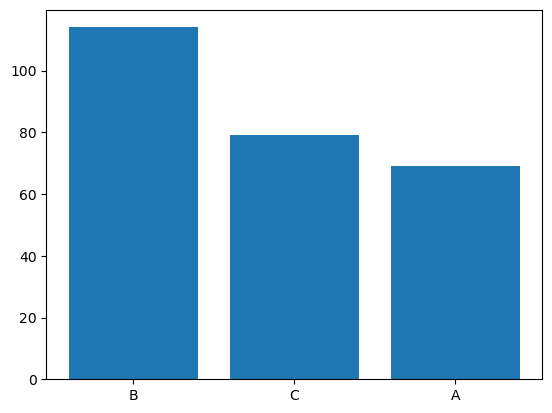

In [31]:
x = dataset["class"].value_counts().index
y = dataset["class"].value_counts().values
plt.bar(x,y)

# Preprocessing

## chi^2 test, between ["A","B","C"]
- 목적 : 각각의 클래스에서 각각의 SNP변수에서 나오는 G G or A g 등등.. 의 값의 빈도수가 같은지 아니면 다른지 카이제곱검정을 통해서 파악한 후, 클래스별로 빈도수 차이있으면 그 행만 추가

In [32]:
"""
#1 각각의 독립변수(검정에서는 class)별로 SNP_01의 특정값(예를 들면 GG)가 나오는 관측치 세어보기

#컬럼,클래스 지정
snp_name = [col_name for col_name in dataset.columns if "SNP" in col_name]
class_name = ["A","B","C"]

signif_col = []
unsignif_col = []
for snp in snp_name:
    _snp_unique = dataset.loc[:,snp].unique().tolist()
    for unq_vl in _snp_unique:
        _condition = (dataset.loc[:,snp] == unq_vl)
        _data = dataset.loc[_condition,[snp,"class"]].dropna(axis=0).value_counts().droplevel(axis=0,level=0).copy()
        _data_class = _data.index
        for cl_name in class_name:
            if cl_name not in _data_class:
                #print("존재하지 않는 class : ",cl_name)
                #print("존재하지 않는 클래스 추가후 df")
                _data = _data.append(pd.Series({cl_name:0}))

        _data = _data[class_name]
        #특정컬럼의 특정값에 대해서 카이제곱검정 수행
        #예를 들어서 각각의 클래스 A,B,C에서 SNP_01의 A A값을 가지는 빈도가 같은지 다른지 수행
        f_obs = _data.values.tolist()
        p_value = chisquare(f_obs)[1].round(5)
        if p_value < 0.01: #유의확률 0.01
            #print(f"{snp}={unq_vl}")
            #print("p_value :",p_value)
            name = snp+"="+unq_vl
            signif_col.append(name)
        else:
            name = snp+"="+unq_vl
            unsignif_col.append(name)
len(signif_col),len(unsignif_col)
"""

'\n#1 각각의 독립변수(검정에서는 class)별로 SNP_01의 특정값(예를 들면 GG)가 나오는 관측치 세어보기\n\n#컬럼,클래스 지정\nsnp_name = [col_name for col_name in dataset.columns if "SNP" in col_name]\nclass_name = ["A","B","C"]\n\nsignif_col = []\nunsignif_col = []\nfor snp in snp_name:\n    _snp_unique = dataset.loc[:,snp].unique().tolist()\n    for unq_vl in _snp_unique:\n        _condition = (dataset.loc[:,snp] == unq_vl)\n        _data = dataset.loc[_condition,[snp,"class"]].dropna(axis=0).value_counts().droplevel(axis=0,level=0).copy()\n        _data_class = _data.index\n        for cl_name in class_name:\n            if cl_name not in _data_class:\n                #print("존재하지 않는 class : ",cl_name)\n                #print("존재하지 않는 클래스 추가후 df")\n                _data = _data.append(pd.Series({cl_name:0}))\n\n        _data = _data[class_name]\n        #특정컬럼의 특정값에 대해서 카이제곱검정 수행\n        #예를 들어서 각각의 클래스 A,B,C에서 SNP_01의 A A값을 가지는 빈도가 같은지 다른지 수행\n        f_obs = _data.values.tolist()\n        p_value = chisquare(f_obs)[1].round(

## chi^2 test, between "B","C"
- 목적 : 각각의 클래스에서 각각의 SNP변수에서 나오는 G G or A g 등등.. 의 값의 빈도수가 같은지 아니면 다른지 카이제곱검정을 통해서 파악한 후, 클래스별로 빈도수 차이있으면 그 행만 추가

In [33]:
# EDA과정에서 trait == 1 이면 반드시 A였음,따라서 trait 변수는 제거하고 나중에 trait == 1이면 반드시 1로 제출
idx = dataset[dataset.trait == 1].index
_dt = dataset.drop(index=idx)

In [34]:
_dt

,id,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,2,G G,A G,A A,G A,C A,A A,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,2,A G,A G,C A,A A,A A,A G,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,2,G G,G G,A A,G A,C C,G G,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
4,TRAIN_004,2,G G,G G,C C,A A,C C,A A,A A,A A,A A,G G,A A,A A,A G,A A,G A,C
5,TRAIN_005,2,G G,G G,C A,A A,C C,A A,A A,G A,A A,G G,A A,A A,A A,A A,A A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,TEST_170,2,A G,G G,C C,A A,C A,A G,A A,G G,A A,G G,G G,A A,A A,A A,G A,NaN
433,TEST_171,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,A G,A A,A A,A G,A A,G A,NaN
434,TEST_172,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,G G,A G,A A,A G,A A,G G,NaN
435,TEST_173,2,A G,G G,C A,G A,C C,G G,A A,G A,A A,G G,A G,A A,A A,A A,A A,NaN


In [35]:
#1 각각의 독립변수(검정에서는 class)별로 SNP_01의 특정값(예를 들면 GG)가 나오는 관측치 세어보기

#컬럼,클래스 지정
snp_name = [col_name for col_name in _dt.columns if "SNP" in col_name]
class_name = ["B","C"]

signif_col = []
unsignif_col = []
for snp in snp_name:
    _snp_unique = _dt.loc[:,snp].unique().tolist()
    for unq_vl in _snp_unique:
        _condition = (_dt.loc[:,snp] == unq_vl)
        _data = _dt.loc[_condition,[snp,"class"]].dropna(axis=0).value_counts().droplevel(axis=0,level=0).copy()
        _data_class = _data.index
        for cl_name in class_name:
            if cl_name not in _data_class:
                #print("존재하지 않는 class : ",cl_name)
                #print("존재하지 않는 클래스 추가후 df")
                _data = _data.append(pd.Series({cl_name:0}))

        _data = _data[class_name]
        #특정컬럼의 특정값에 대해서 카이제곱검정 수행
        #예를 들어서 각각의 클래스 A,B,C에서 SNP_01의 A A값을 가지는 빈도가 같은지 다른지 수행
        f_obs = _data.values.tolist()
        p_value = chisquare(f_obs)[1].round(5)
        if p_value < 0.05: #유의확률 0.01
            #print(f"{snp}={unq_vl}")
            #print("p_value :",p_value)
            name = snp+"_"+unq_vl
            signif_col.append(name)
        else:
            name = snp+"_"+unq_vl
            unsignif_col.append(name)
len(signif_col),len(unsignif_col)

(27, 17)

In [36]:
signif_col

['SNP_01_G G',
 'SNP_01_A A',
 'SNP_02_A G',
 'SNP_02_G G',
 'SNP_02_A A',
 'SNP_03_C A',
 'SNP_03_C C',
 'SNP_04_G A',
 'SNP_04_A A',
 'SNP_04_G G',
 'SNP_05_A A',
 'SNP_05_C C',
 'SNP_06_A G',
 'SNP_07_A A',
 'SNP_07_G A',
 'SNP_08_G G',
 'SNP_08_A A',
 'SNP_09_G A',
 'SNP_10_G G',
 'SNP_10_A G',
 'SNP_10_A A',
 'SNP_11_A G',
 'SNP_11_G G',
 'SNP_13_A A',
 'SNP_14_A A',
 'SNP_14_C A',
 'SNP_15_A A']

In [37]:
unsignif_col

['SNP_01_A G',
 'SNP_03_A A',
 'SNP_05_C A',
 'SNP_06_A A',
 'SNP_06_G G',
 'SNP_08_G A',
 'SNP_09_A A',
 'SNP_09_G G',
 'SNP_11_A A',
 'SNP_12_A A',
 'SNP_12_G A',
 'SNP_12_G G',
 'SNP_13_G G',
 'SNP_13_A G',
 'SNP_14_C C',
 'SNP_15_G A',
 'SNP_15_G G']

In [38]:
"""
import scipy.stats as stats
import numpy as np
  
# Make a 3 x 3 table
dataset = np.array([[13, 17, 11], [4, 6, 9],
                    [20, 31, 42]])
  
# Finding Chi-squared test statistic,
# sample size, and minimum of rows
# and columns
X2 = stats.chi2_contingency(dataset, correction=False)
N = np.sum(dataset)
minimum_dimension = min(dataset.shape)-1
X2
"""

'\nimport scipy.stats as stats\nimport numpy as np\n  \n# Make a 3 x 3 table\ndataset = np.array([[13, 17, 11], [4, 6, 9],\n                    [20, 31, 42]])\n  \n# Finding Chi-squared test statistic,\n# sample size, and minimum of rows\n# and columns\nX2 = stats.chi2_contingency(dataset, correction=False)\nN = np.sum(dataset)\nminimum_dimension = min(dataset.shape)-1\nX2\n'

## add column & delete column

In [39]:
def create_col(dataset,col,value):
    _t = []
    for val in dataset[col] == value:
        if val == True:
            _t.append(1)
        else:
            _t.append(0)
    
    col_name_base = "has"+col[-2:]
    value_name = ""
    for chr in value:
        if chr != " ":
            value_name+=chr
    col_name = col_name_base+value_name
    print(col_name)
    dataset[col_name] = _t

    return dataset

"""
dataset = create_col(dataset,"SNP_01","G G")
dataset = create_col(dataset,"SNP_02","A A")
dataset = create_col(dataset,"SNP_03","A A")
dataset = create_col(dataset,"SNP_04","G G")
dataset = create_col(dataset,"SNP_05","C C")
dataset = create_col(dataset,"SNP_06","A A")
dataset = create_col(dataset,"SNP_07","A A")
dataset = create_col(dataset,"SNP_07","G G")
dataset = create_col(dataset,"SNP_08","G G")
dataset = create_col(dataset,"SNP_09","A A")
dataset = create_col(dataset,"SNP_09","G G")
dataset = create_col(dataset,"SNP_11","A A")
dataset = create_col(dataset,"SNP_12","A A")
dataset = create_col(dataset,"SNP_12","G G")
dataset = create_col(dataset,"SNP_13","A A")
dataset = create_col(dataset,"SNP_14","A A")
"""
#dataset = dataset.drop(columns = ["SNP_03","SNP_04","SNP_05","SNP_06","SNP_07","SNP_08","SNP_09","SNP_11","SNP_12","SNP_13","SNP_14"])

'\ndataset = create_col(dataset,"SNP_01","G G")\ndataset = create_col(dataset,"SNP_02","A A")\ndataset = create_col(dataset,"SNP_03","A A")\ndataset = create_col(dataset,"SNP_04","G G")\ndataset = create_col(dataset,"SNP_05","C C")\ndataset = create_col(dataset,"SNP_06","A A")\ndataset = create_col(dataset,"SNP_07","A A")\ndataset = create_col(dataset,"SNP_07","G G")\ndataset = create_col(dataset,"SNP_08","G G")\ndataset = create_col(dataset,"SNP_09","A A")\ndataset = create_col(dataset,"SNP_09","G G")\ndataset = create_col(dataset,"SNP_11","A A")\ndataset = create_col(dataset,"SNP_12","A A")\ndataset = create_col(dataset,"SNP_12","G G")\ndataset = create_col(dataset,"SNP_13","A A")\ndataset = create_col(dataset,"SNP_14","A A")\n'

## encoding

In [40]:
_dataset = dataset
_dataset

,id,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,2,G G,A G,A A,G A,C A,A A,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,2,A G,A G,C A,A A,A A,A G,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,2,G G,G G,A A,G A,C C,G G,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,1,A A,G G,A A,G A,A A,G G,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,2,G G,G G,C C,A A,C C,A A,A A,A A,A A,G G,A A,A A,A G,A A,G A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,TEST_170,2,A G,G G,C C,A A,C A,A G,A A,G G,A A,G G,G G,A A,A A,A A,G A,NaN
433,TEST_171,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,A G,A A,A A,A G,A A,G A,NaN
434,TEST_172,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,G G,A G,A A,A G,A A,G G,NaN
435,TEST_173,2,A G,G G,C A,G A,C C,G G,A A,G A,A A,G G,A G,A A,A A,A A,A A,NaN


### onehot-encoding trait != 1 (A클래스 빼고)

In [60]:
_dt = _dataset.loc[_dataset.trait != 1,:].copy()
cl = _dt["class"]
#print(cl)
one_hot_label = [col_name for col_name in _dt.columns if "SNP" in col_name]
get_class = ["id"]+signif_col + ["trait","class"]
trait_map = {1:0,2:1}


class_map = {"A":0,"B":1,"C":2}
_dt = pd.get_dummies(_dt,columns = one_hot_label)
_dt["class"] = cl.map(class_map)
cond = ~pd.isna(_dt["class"])
train_ohe = _dt.loc[cond,:]
train_ohe = train_ohe.loc[:,get_class]
train_ohe["trait"] = train_ohe["trait"].map(trait_map)
train_ohe["class"] = train_ohe["class"].astype(int)

test_ohe = _dt.loc[~cond,:][get_class]
test_ohe = test_ohe.drop(columns = "class")
test_ohe["trait"] = test_ohe["trait"].map(trait_map)

In [61]:
train_id = train_ohe["id"]
X_train_ohe = train_ohe.drop(columns = ["class","id"])
Y_train_ohe = train_ohe["class"]

In [77]:
X_train_ohe

,SNP_01_G G,SNP_01_A A,SNP_02_A G,SNP_02_G G,SNP_02_A A,SNP_03_C A,SNP_03_C C,SNP_04_G A,SNP_04_A A,SNP_04_G G,...,SNP_10_G G,SNP_10_A G,SNP_10_A A,SNP_11_A G,SNP_11_G G,SNP_13_A A,SNP_14_A A,SNP_14_C A,SNP_15_A A,trait
0,1,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,1,1,0,1,1
1,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,1,1
2,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,1,1
4,1,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,1
5,1,0,0,1,0,1,0,0,1,0,...,1,0,0,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0,0,0,1,0,1,0,1,0,0,...,1,0,0,0,1,1,1,0,0,1
256,1,0,0,1,0,1,0,1,0,0,...,1,0,0,1,0,1,1,0,1,1
257,0,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,1,1,0,1,1
258,1,0,0,0,1,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1


### label-encoding trait != 0 (A클래스 빼고)

In [ ]:
_dt = _dataset.loc[_dataset.trait != 1,:].copy()
cl = _dt["class"]
#print(cl)
one_hot_label = [col_name for col_name in _dt.columns if "SNP" in col_name]
get_class = ["id"]+signif_col + ["trait","class"]
trait_map = {1:0,2:1}


class_map = {"A":0,"B":1,"C":2}
_dt = pd.get_dummies(_dt,columns = one_hot_label)
_dt["class"] = cl.map(class_map)
cond = ~pd.isna(_dt["class"])
train_ohe = _dt.loc[cond,:]
train_ohe = train_ohe.loc[:,get_class]
train_ohe["trait"] = train_ohe["trait"].map(trait_map)
train_ohe["class"] = train_ohe["class"].astype(int)

test_ohe = _dt.loc[~cond,:][get_class]
test_ohe = test_ohe.drop(columns = "class")
test_ohe["trait"] = test_ohe["trait"].map(trait_map)

### One-hot encoding 

In [48]:
"""
#one-hot encoding for distance base algorithm
dataset_ohe = pd.get_dummies(_dataset,columns = _dataset.columns.drop("class"),drop_first=True) #multicollinearity를 막기위한 drop_first 옵션
train_ohe = dataset_ohe[:train_len].copy()
test_ohe = dataset_ohe[train_len:].copy().drop(columns="class")

class_map = {"A":0,"B":1,"C":2}
train_ohe["class"]=train_ohe["class"].map(class_map).astype(int)
X_train_ohe = train_ohe.drop(columns = "class")
Y_train_ohe = train_ohe["class"]
"""

'\n#one-hot encoding for distance base algorithm\ndataset_ohe = pd.get_dummies(_dataset,columns = _dataset.columns.drop("class"),drop_first=True) #multicollinearity를 막기위한 drop_first 옵션\ntrain_ohe = dataset_ohe[:train_len].copy()\ntest_ohe = dataset_ohe[train_len:].copy().drop(columns="class")\n\nclass_map = {"A":0,"B":1,"C":2}\ntrain_ohe["class"]=train_ohe["class"].map(class_map).astype(int)\nX_train_ohe = train_ohe.drop(columns = "class")\nY_train_ohe = train_ohe["class"]\n'

### Label encoding

In [49]:
"""
le_col = []
for col_name in dataset.columns.tolist():
    if "SNP" in col_name:
        le_col.append(col_name)
le_col.append("trait")
from sklearn import preprocessing
for col in le_col:
    le = preprocessing.LabelEncoder()
    _col = dataset[col].tolist()
    le.fit(_col)
    dataset[col] = le.transform(_col)
dataset
"""

'\nle_col = []\nfor col_name in dataset.columns.tolist():\n    if "SNP" in col_name:\n        le_col.append(col_name)\nle_col.append("trait")\nfrom sklearn import preprocessing\nfor col in le_col:\n    le = preprocessing.LabelEncoder()\n    _col = dataset[col].tolist()\n    le.fit(_col)\n    dataset[col] = le.transform(_col)\ndataset\n'

In [50]:
"""
train = dataset[:train_len].copy()
test = dataset[train_len:].copy().drop(columns="class")

class_map = {"A":0,"B":1,"C":2}
train["class"]=train["class"].map(class_map).astype(int)
X_train = train.drop(columns = "class")
Y_train = train["class"]
"""

'\ntrain = dataset[:train_len].copy()\ntest = dataset[train_len:].copy().drop(columns="class")\n\nclass_map = {"A":0,"B":1,"C":2}\ntrain["class"]=train["class"].map(class_map).astype(int)\nX_train = train.drop(columns = "class")\nY_train = train["class"]\n'

# modeling

In [91]:
import random
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,learning_curve,cross_val_predict


sns.set(style='white',context='notebook',palette='deep')

In [92]:
kfold = StratifiedKFold(n_splits=5)

In [93]:
#with trait = 0
"""
random_state=2
name_classifiers=[("SVC",SVC(random_state=random_state)),\
                  ("DecisionTree",DecisionTreeClassifier(random_state=random_state)),\
                  ("AdaBoost",AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state)),\
                  ("RandomForest",RandomForestClassifier(random_state=random_state)),\
                  ("ExtraTrees",ExtraTreesClassifier(random_state=random_state)),\
                  ("GradientBoosting",GradientBoostingClassifier(random_state=random_state)),\
                  ("MultipleLayerPerceptron",MLPClassifier(random_state=random_state)),\
                  ("KNeighbors",KNeighborsClassifier()),\
                  ("LogisticRegression",LogisticRegression(random_state=random_state)),\
                  ("LinearDiscriminantAnalysis",LinearDiscriminantAnalysis())]
modelname=[]
scores=[]
ac_mean=[]
ac_std=[]
i=0
for name,model in name_classifiers:
    #print(name,model)
    modelname.append(name)
    if name not in ["DecisionTree","RandomForest","ExtraTrees"]:
        scores.append(cross_val_score(model,X_train_ohe,Y_train_ohe,scoring="accuracy",verbose=0,n_jobs=4,cv=kfold))
        ac_mean.append(scores[i].mean())
        ac_std.append(scores[i].std())
    else:
        scores.append(cross_val_score(model,X_train,Y_train,scoring="accuracy",verbose=0,n_jobs=4,cv=kfold))
        ac_mean.append(scores[i].mean())
        ac_std.append(scores[i].std())

    #print(ac_mean[i],ac_std[i])
    i+=1
cv_res=pd.DataFrame({"Algorithm":modelname,"CV_mean":ac_mean,"CV_std":ac_std})
g=sns.barplot(data=cv_res,orient='h',y="Algorithm",x="CV_mean",palette="Set3",**{"xerr":ac_std})
g.set_title("Cross validation scores")
g.set_ylabel("Algorithm")
g.set_xlabel("Mean Accuracy")
"""

'\nrandom_state=2\nname_classifiers=[("SVC",SVC(random_state=random_state)),                  ("DecisionTree",DecisionTreeClassifier(random_state=random_state)),                  ("AdaBoost",AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state)),                  ("RandomForest",RandomForestClassifier(random_state=random_state)),                  ("ExtraTrees",ExtraTreesClassifier(random_state=random_state)),                  ("GradientBoosting",GradientBoostingClassifier(random_state=random_state)),                  ("MultipleLayerPerceptron",MLPClassifier(random_state=random_state)),                  ("KNeighbors",KNeighborsClassifier()),                  ("LogisticRegression",LogisticRegression(random_state=random_state)),                  ("LinearDiscriminantAnalysis",LinearDiscriminantAnalysis())]\nmodelname=[]\nscores=[]\nac_mean=[]\nac_std=[]\ni=0\nfor name,model in name_classifiers:\n    #print(name,model)\n    modelname.append(name)\n 

In [94]:
cv_res

NameError: name 'cv_res' is not defined

In [95]:
cv_res

NameError: name 'cv_res' is not defined

Text(0.5, 0, 'Mean Accuracy')

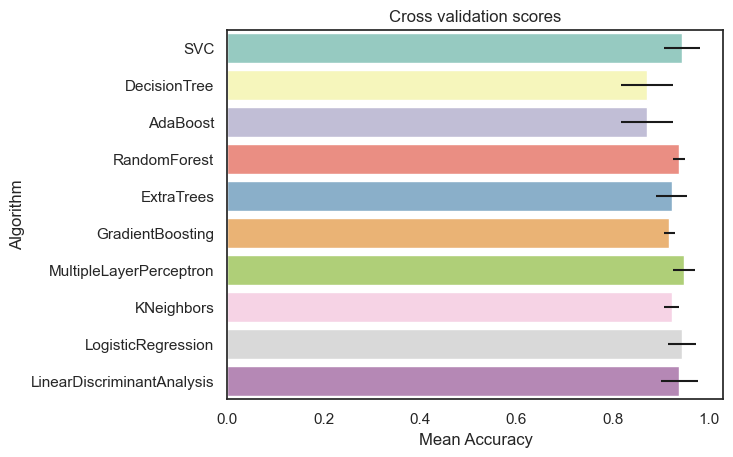

In [97]:
random_state=2
name_classifiers=[("SVC",SVC(random_state=random_state)),\
                  ("DecisionTree",DecisionTreeClassifier(random_state=random_state)),\
                  ("AdaBoost",AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state)),\
                  ("RandomForest",RandomForestClassifier(random_state=random_state)),\
                  ("ExtraTrees",ExtraTreesClassifier(random_state=random_state)),\
                  ("GradientBoosting",GradientBoostingClassifier(random_state=random_state)),\
                  ("MultipleLayerPerceptron",MLPClassifier(random_state=random_state)),\
                  ("KNeighbors",KNeighborsClassifier()),\
                  ("LogisticRegression",LogisticRegression(random_state=random_state)),\
                  ("LinearDiscriminantAnalysis",LinearDiscriminantAnalysis())]
modelname=[]
scores=[]
ac_mean=[]
ac_std=[]
i=0
for name,model in name_classifiers:
    #print(name,model)
    modelname.append(name)
    scores.append(cross_val_score(model,X_train_ohe,Y_train_ohe,scoring="accuracy",verbose=0,n_jobs=4,cv=kfold))
    ac_mean.append(scores[i].mean())
    ac_std.append(scores[i].std())
                
    #print(ac_mean[i],ac_std[i])
    i+=1
cv_res=pd.DataFrame({"Algorithm":modelname,"CV_mean":ac_mean,"CV_std":ac_std})
g=sns.barplot(data=cv_res,orient='h',y="Algorithm",x="CV_mean",palette="Set3",**{"xerr":ac_std})
g.set_title("Cross validation scores")
g.set_ylabel("Algorithm")
g.set_xlabel("Mean Accuracy")

In [98]:
cv_res

,Algorithm,CV_mean,CV_std
0,SVC,0.943185,0.037541
1,DecisionTree,0.870985,0.053543
2,AdaBoost,0.870985,0.053543
3,RandomForest,0.937922,0.012131
4,ExtraTrees,0.922402,0.032663
5,GradientBoosting,0.917004,0.011161
6,MultipleLayerPerceptron,0.948448,0.022633
7,KNeighbors,0.922402,0.015807
8,LogisticRegression,0.943320,0.029625
9,LinearDiscriminantAnalysis,0.938192,0.038124


In [976]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,learning_curve

In [25]:
ExtC = ExtraTreesClassifier()

ExtC_param_grid = {
    "max_depth" : [1,3,7,10],
    "max_features" : [1,3,7,10],
    "min_samples_split" : [1,3,7,10],
    'min_samples_leaf':[1,3,7,10],
    "bootstrap":[False,True],
    "n_estimators" : [i * 10 for i in range(1,50,5)],"criterion":["gini","entropy"]}

gsExtC = GridSearchCV(ExtC,ExtC_param_grid,scoring='accuracy',n_jobs=4,verbose=2,cv=kfold)

gsExtC.fit(X_train,Y_train)

ExtC_Best=gsExtC.best_estimator_

Fitting 5 folds for each of 25000 candidates, totalling 125000 fits


In [ ]:
gsExtC.best_score_

0.9695210449927432

In [ ]:
ExtC_Best

ExtraTreesClassifier(criterion='entropy', max_depth=6, max_features=2,
                     min_samples_split=6, n_estimators=400)

ExtC<br>
gs try1:0.9618233618233617

In [546]:
RFC=RandomForestClassifier()

rf_param_grid={"max_depth":[10,12,14,16],
              "max_features":[10,12,14,16],
              "min_samples_split":[10,12,14,16],
              'min_samples_leaf':[10,12,14,16],
              'bootstrap':[True, False],
              'n_estimators':[150,170,200,220,250],
              "criterion":["gini","entropy"],
}
gsRFC = GridSearchCV(RFC,rf_param_grid,cv=kfold,scoring='accuracy',n_jobs=4,verbose=3)
gsRFC.fit(X_train,Y_train)
RFC_best = gsRFC.best_estimator_

Fitting 5 folds for each of 5120 candidates, totalling 25600 fits


In [543]:
RFC_best

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=10,
                       min_samples_split=10, n_estimators=200)

RFC<br>
RandomForestClassifier(criterion='entropy', max_depth=10, max_features=10,min_samples_split=10, n_estimators=200) : 0.9695936139332366<br>
=> max_depth,max_features가 리스트중 최댓값에서 성능이 가장 좋은 것으로 보아,조금 더 깊게 설정해서 데이터를 더 적합시키는 방향으로 가야할 듯?<br>
RandomForestClassifier(criterion=")

In [65]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf',"poly","linear"], 
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                  'C': [i * 10 for i in range(1,101)]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 2)

gsSVMC.fit(X_train_ohe,Y_train_ohe)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


0.9692307692307693

In [67]:
X_train_ohe

,SNP_01_G G,SNP_01_A A,SNP_02_A G,SNP_02_G G,SNP_02_A A,SNP_03_C A,SNP_03_C C,SNP_04_G A,SNP_04_A A,SNP_04_G G,...,SNP_10_G G,SNP_10_A G,SNP_10_A A,SNP_11_A G,SNP_11_G G,SNP_13_A A,SNP_14_A A,SNP_14_C A,SNP_15_A A,trait
0,1,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,1,1,0,1,1
1,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,1,1
2,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,1,1
4,1,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,1
5,1,0,0,1,0,1,0,0,1,0,...,1,0,0,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0,0,0,1,0,1,0,1,0,0,...,1,0,0,0,1,1,1,0,0,1
256,1,0,0,1,0,1,0,1,0,0,...,1,0,0,1,0,1,1,0,1,1
257,0,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,1,1,0,1,1
258,1,0,0,0,1,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1


In [66]:
SVMC_best.predict()

TypeError: predict() missing 1 required positional argument: 'X'

In [983]:
MLP=MLPClassifier()

mlp_param_grid={
    "hidden_layer_sizes" : [i for i in range(10,101,20)],
    "solver" : ["lbfgs","adam"],
    "alpha" : [0.0001,0.001],
    "learning_rate":["constant","adaptive"],
    'max_iter': [1000,1500,2000],
    'alpha': 10.0 ** -np.arange(1, 10)
}
gsMLP = GridSearchCV(MLP,mlp_param_grid,cv=kfold,scoring='accuracy',n_jobs=4,verbose=2)
gsMLP.fit(X_train_ohe,Y_train_ohe)
MLP_best = gsMLP.best_estimator_
gsMLP.best_score_

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


0.9657474600870828

In [ ]:
from sklearn.ensemble import VotingClassifier
model=VotingClassifier([("ExtraTrees",ExtC_Best),("RF",RFC_best),("SVM",SVMC_best),("MLP",MLP_best)],voting='soft',n_jobs=4)

model.fit(X_train,Y_train)

VotingClassifier(estimators=[('ExtraTrees',
                              ExtraTreesClassifier(max_features=1,
                                                   min_samples_split=10,
                                                   n_estimators=300)),
                             ('RF',
                              RandomForestClassifier(bootstrap=False,
                                                     max_features=1,
                                                     min_samples_split=10,
                                                     n_estimators=300)),
                             ('SVM', SVC(C=1, gamma=0.01, probability=True)),
                             ('MLP',
                              MLPClassifier(hidden_layer_sizes=150,
                                            solver='sgd'))],
                 n_jobs=4, voting='soft')

In [984]:
Lg=LogisticRegression()

Lg_param_grid={
    "penalty":["l1", "l2", "elasticnet", None],
    "solver" : ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
    "l1_ratio" : np.linspace(0,1,30).tolist()
}
gsLg = GridSearchCV(Lg,Lg_param_grid,cv=kfold,scoring='accuracy',n_jobs=4,verbose=2)
gsLg.fit(X_train_ohe,Y_train_ohe)
Lg_best = gsLg.best_estimator_
gsLg.best_score_

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


0.9582002902757619

In [ ]:
from sklearn.ensemble import VotingClassifier
model=VotingClassifier([("ExtraTrees",ExtC_Best),("RF",RFC_best),("SVM",SVMC_best),("MLP",MLP_best),("LogisticRegression",Lg_best)],voting='soft',n_jobs=4)
model.fit(X_train,Y_train)

VotingClassifier(estimators=[('ExtraTrees',
                              ExtraTreesClassifier(max_features=1,
                                                   min_samples_split=10,
                                                   n_estimators=300)),
                             ('RF',
                              RandomForestClassifier(bootstrap=False,
                                                     max_features=1,
                                                     min_samples_split=10,
                                                     n_estimators=300)),
                             ('SVM', SVC(C=1, gamma=0.01, probability=True)),
                             ('MLP',
                              MLPClassifier(hidden_layer_sizes=150,
                                            solver='sgd')),
                             ('LogisticRegression',
                              LogisticRegression(l1_ratio=0.0,
                                                 solver='liblinear'))],
                 n_jobs=4, voting='soft')

In [ ]:
test

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,TEST_000,0,0,0,1,A G,G G,A A,G A,A A,A G,G G,G A,G A,A G,A G,G A,G G,C A,G A
1,TEST_001,0,0,0,2,G G,A G,C C,G G,C C,A A,A A,A A,A A,G G,A G,A A,A A,A A,A A
2,TEST_002,0,0,0,2,G G,A G,A A,A A,C A,A G,A A,A A,A A,A G,A A,G A,G G,A A,G G
3,TEST_003,0,0,0,2,G G,A G,C A,A A,C C,A A,A A,A A,A A,G G,A A,G A,A G,A A,A A
4,TEST_004,0,0,0,1,A A,G G,A A,G G,A A,G G,G G,A A,G G,A G,G G,G A,G G,A A,G G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,TEST_170,0,0,0,2,A G,G G,C C,A A,C A,A G,A A,G G,A A,G G,G G,A A,A A,A A,G A
171,TEST_171,0,0,0,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,A G,A A,A A,A G,A A,G A
172,TEST_172,0,0,0,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,G G,A G,A A,A G,A A,G G
173,TEST_173,0,0,0,2,A G,G G,C A,G A,C C,G G,A A,G A,A A,G G,A G,A A,A A,A A,A A


In [ ]:
model.predict(test)

array([0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 0, 1, 2, 0, 1, 2, 2, 2, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       2, 0, 1, 1, 2, 1, 1, 2, 0, 1, 0, 2, 0, 1, 1, 2, 0, 0, 2, 1, 0, 1,
       2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 1, 1],
      dtype=int64)

In [ ]:
result = pd.concat((pd.Series(id_test),pd.Series(model.predict(test))),axis=1)
result.columns = ["id","class"]
class_map_inv = {0:"A",1:"B",2:"C"}
result["class"] = result["class"].map(class_map_inv)

In [ ]:
result.to_csv("./submission.csv",index=False)